In [1]:


# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
from glob import glob
pd.set_option('display.max_columns', None)

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


In [2]:
dfs = []

# Iterate over CSV files in the specified directory
for f in glob('dataset/flight_delay/*.csv'):
    try:
        df = pd.read_csv(f)  # Provide the file path to read_csv
        dfs.append(df)
    except Exception as e:
        print(f"Error reading file {f}: {e}")

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [3]:
# Check first 2 instances and last 2 instances
df.head(2).append(df.tail(2))


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
18505723,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
18505724,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check dimension of dataset
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 18505725 rows and 28 columns from the flight dataset.


In [5]:
# Convert df column to datetime format
df['FL_DATE'] =  pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [6]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505725 entries, 0 to 18505724
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME

In [7]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.567265
2   LATE_AIRCRAFT_DELAY   81.916828
3         CARRIER_DELAY   81.916828
4         WEATHER_DELAY   81.916828
5             NAS_DELAY   81.916828
6        SECURITY_DELAY   81.916828
7             ARR_DELAY    1.684689
8   ACTUAL_ELAPSED_TIME    1.670651
9              AIR_TIME    1.670651
10            WHEELS_ON    1.468540
11              TAXI_IN    1.468540
12             ARR_TIME    1.468535
13             TAXI_OUT    1.423305
14           WHEELS_OFF    1.423278
15            DEP_DELAY    1.410553
16             DEP_TIME    1.383793
17     CRS_ELAPSED_TIME    0.000124


In [8]:
#Fill the missing value 0
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['CARRIER_DELAY']=df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY']=df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].fillna(0)

In [9]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure


In [10]:
df['DEP_TIME'] = df['DEP_TIME'].apply(format_heure)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_heure)

df['ARR_TIME'] = df['ARR_TIME'].apply(format_heure) 
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(format_heure)

df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_heure)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(format_heure)

In [11]:
# Convert df column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

df['WHEELS_OFF_elapse'] =  time_difference(df['WHEELS_OFF'],df['DEP_TIME'])
df['WHEELS_ON_elapse'] =  time_difference(df['ARR_TIME'] ,df['WHEELS_ON'])

# Remove incorrect record
df=df[df['WHEELS_OFF_elapse']>0]
df=df[df['WHEELS_ON_elapse']>0]

In [12]:
# Check first 2 instances and last 2 instances
df.head(2).append(df.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2016-01-01,DL,1248,DTW,LAX,19:35:00,19:35:00,0.0,23.0,19:58:00,21:07:00,13.0,21:44:00,21:20:00,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,0.0,0.0,0.0,0.0,0.0,NaN,23.0,13.0
1,2016-01-01,DL,1251,ATL,GRR,21:25:00,21:30:00,5.0,13.0,21:43:00,23:15:00,4.0,23:21:00,23:19:00,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,0.0,0.0,0.0,0.0,0.0,NaN,13.0,4.0
18505723,2018-12-31,AA,1818,CLT,RDU,13:00:00,13:23:00,23.0,11.0,13:34:00,14:00:00,4.0,13:50:00,14:04:00,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,4.0
18505724,2018-12-31,AA,1818,RDU,CLT,14:35:00,14:43:00,8.0,8.0,14:51:00,15:35:00,7.0,15:46:00,15:42:00,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0,7.0


In [13]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18121257 entries, 0 to 18505724
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME

In [14]:
# Drop the unused columns 

df.drop(['Unnamed: 27', 
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

In [15]:
#Check number of missing values
df.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                     0
DEST                       0
DEP_DELAY               4735
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY              39445
DIVERTED                   0
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME    36847
AIR_TIME               36847
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
#Check number of missing values
df.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

In [18]:
# Check the instances for OP_CARRIER
df.OP_CARRIER.unique()

array(['DL', 'AS', 'EV', 'F9', 'WN', 'OO', 'HA', 'NK', 'UA', 'VX', 'AA',
       'B6', '9E', 'G4', 'MQ', 'OH', 'YV', 'YX'], dtype=object)

In [19]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [20]:
df.OP_CARRIER.nunique()

18

In [21]:
df.OP_CARRIER.value_counts()

Southwest Airlines    3906109
Delta Airlines        2758113
American Airlines     2660731
SkyWest Airlines      2044144
United Airlines       1715282
ExpressJet            1000689
JetBlue Airways        852895
Alaska Airlines        595727
Spirit Airlines        454577
Frontier Airlines      308534
Republic Airways       303927
Envoy Air              283788
PSA Airlines           264929
Hawaiian Airlines      239356
Endeavor Air           231211
Mesa Airline           208382
Virgin America         153849
Allegiant Air           94982
Name: OP_CARRIER, dtype: int64

In [22]:
df.DEST.value_counts().iloc[:20]

ATL    1121727
ORD     819106
DEN     674233
DFW     640792
LAX     636018
SFO     510198
PHX     481089
LAS     456520
CLT     445229
IAH     428629
MSP     417104
SEA     403577
DTW     401036
MCO     386227
BOS     381619
EWR     360096
LGA     344793
SLC     330887
JFK     306092
BWI     295436
Name: DEST, dtype: int64

In [23]:
top_cities = df.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,1121727


In [24]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [25]:
boolean_series =  df.DEST.isin(city_list)
df =  df[boolean_series]
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
2,2016-01-01,Delta Airlines,LAX,ATL,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0
3,2016-01-01,Delta Airlines,SLC,ATL,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0
6,2016-01-01,Delta Airlines,BNA,ATL,86.0,15.0,6.0,74.0,0.0,70.0,58.0,37.0,214.0,3.0,0.0,0.0,0.0,71.0,15.0,6.0
8,2016-01-01,Delta Airlines,JAX,ATL,-1.0,12.0,8.0,-15.0,0.0,77.0,63.0,43.0,270.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0
13,2016-01-01,Delta Airlines,MDT,ATL,-10.0,11.0,11.0,-15.0,0.0,132.0,127.0,105.0,620.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121727 entries, 2 to 18505717
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1121727 non-null  datetime64[ns]
 1   OP_CARRIER           1121727 non-null  object        
 2   ORIGIN               1121727 non-null  object        
 3   DEST                 1121727 non-null  object        
 4   DEP_DELAY            1121727 non-null  float64       
 5   TAXI_OUT             1121727 non-null  float64       
 6   TAXI_IN              1121727 non-null  float64       
 7   ARR_DELAY            1121727 non-null  float64       
 8   DIVERTED             1121727 non-null  float64       
 9   CRS_ELAPSED_TIME     1121727 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  1121727 non-null  float64       
 11  AIR_TIME             1121727 non-null  float64       
 12  DISTANCE             1121727 non-null  float64       
 

In [27]:
import calendar
flight_date=pd.DatetimeIndex(df['FL_DATE'])

df['DAY'] = flight_date.day
df['MONTH'] = flight_date.month
df['MONTH_AB'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df['DAYOFWEEK'] = flight_date.dayofweek
df['DAYNAME'] = df['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in df['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
df['WEEKDAY'] = daytype
df.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
2,2016-01-01,Delta Airlines,LAX,ATL,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1
3,2016-01-01,Delta Airlines,SLC,ATL,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1


In [28]:
# For checking
print('Maximum number of days in a month:', df.DAY.nunique())
print('Total number of months:', df.MONTH.nunique())
print('Total number of days per week:', df.DAYNAME.nunique())

print()

print('Months present in dataframe:',df.MONTH.unique())
print('Months present in dataframe:', df.MONTH_AB.unique())

print()
print('Days present in dataframe:', df['DAYOFWEEK'].unique())
print('Days present in dataframe:', df.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [4 5 6 0 1 2 3]
Days present in dataframe: ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [29]:
airports = pd.read_csv('dataset/airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [30]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]))

There are 353 rows and 3


In [31]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [32]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [33]:
df.ORIGIN.unique()


array(['LAX', 'SLC', 'BNA', 'JAX', 'MDT', 'SAV', 'BUF', 'PNS', 'CMH',
       'DAL', 'MEM', 'SEA', 'RDU', 'PIT', 'SRQ', 'SDF', 'RIC', 'LAS',
       'FAY', 'JAC', 'GRR', 'EYW', 'MCI', 'ROC', 'TPA', 'DEN', 'CHS',
       'CVG', 'FLL', 'BWI', 'RSW', 'LGA', 'DTW', 'MIA', 'GSO', 'CLE',
       'GPT', 'LIT', 'IAH', 'PHL', 'MCO', 'IND', 'DAY', 'OKC', 'PHX',
       'BDL', 'STL', 'OMA', 'CAE', 'SAN', 'SJU', 'BOS', 'ORD', 'SAT',
       'MSY', 'PBI', 'MKE', 'SFO', 'SJC', 'IAD', 'DFW', 'AUS', 'ABQ',
       'HOU', 'MSP', 'DCA', 'HDN', 'SGF', 'MSN', 'MLB', 'TUL', 'PDX',
       'ECP', 'HSV', 'BHM', 'EWR', 'TYS', 'SYR', 'MDW', 'ALB', 'BZN',
       'FNT', 'MLI', 'MLU', 'CHA', 'MYR', 'GSP', 'MGM', 'OAJ', 'VPS',
       'SHV', 'GNV', 'TLH', 'BMI', 'TRI', 'FSM', 'VLD', 'GTR', 'BTR',
       'BQK', 'XNA', 'DHN', 'ORF', 'ILM', 'AGS', 'ROA', 'LEX', 'HPN',
       'JAN', 'GRK', 'CRW', 'CID', 'LFT', 'AEX', 'PIA', 'AVL', 'PHF',
       'MOB', 'ABE', 'DSM', 'CLT', 'ABY', 'EWN', 'EVV', 'CSG', 'TTN',
       'CAK', 'OAK',

In [34]:
# Get the list of origin and destination from `df` 
flight_ORIGIN = df.ORIGIN.unique().tolist()
flight_DEST = df.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 168
Destination: 1


In [35]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


In [36]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



In [37]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [38]:
df['ORIGIN'].replace(airport_dict, inplace=True)
df['DEST'].replace(airport_dict, inplace=True)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
2,2016-01-01,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1
3,2016-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1
6,2016-01-01,Delta Airlines,Nashville International Airport,Hartsfield-Jackson Atlanta International Airport,86.0,15.0,6.0,74.0,0.0,70.0,58.0,37.0,214.0,3.0,0.0,0.0,0.0,71.0,15.0,6.0,1,1,Jan,4,Friday,1
8,2016-01-01,Delta Airlines,Jacksonville International Airport,Hartsfield-Jackson Atlanta International Airport,-1.0,12.0,8.0,-15.0,0.0,77.0,63.0,43.0,270.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1
13,2016-01-01,Delta Airlines,Harrisburg International Airport,Hartsfield-Jackson Atlanta International Airport,-10.0,11.0,11.0,-15.0,0.0,132.0,127.0,105.0,620.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,1,1,Jan,4,Friday,1


In [39]:
status = []

for value in df['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status   

In [40]:
flight_category = df.select_dtypes(include=['object','category'])
flight_numerical = df.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

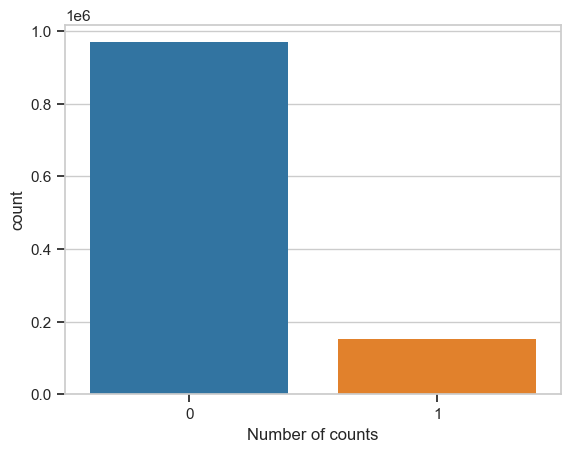

In [41]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

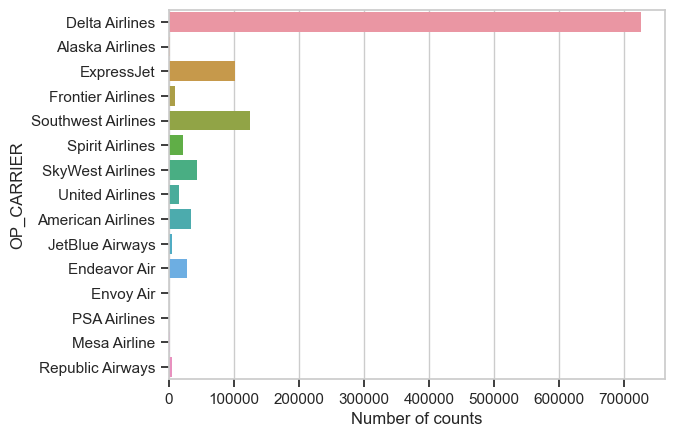

In [42]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

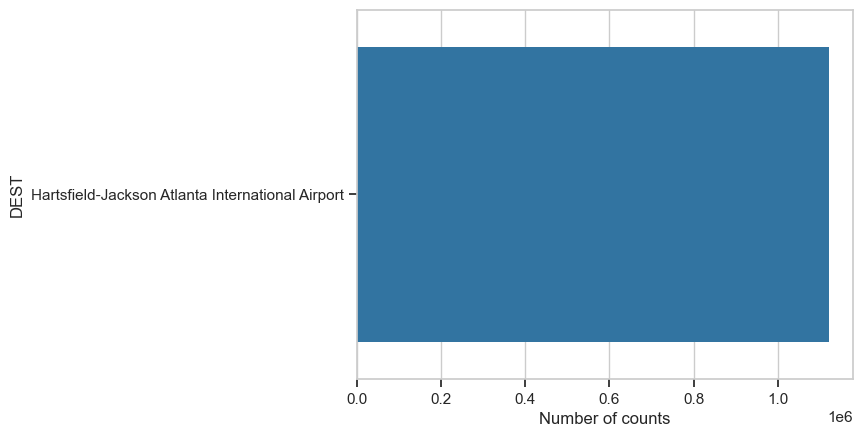

In [43]:
# Output Barplot showing the occurence of each categorical features         

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

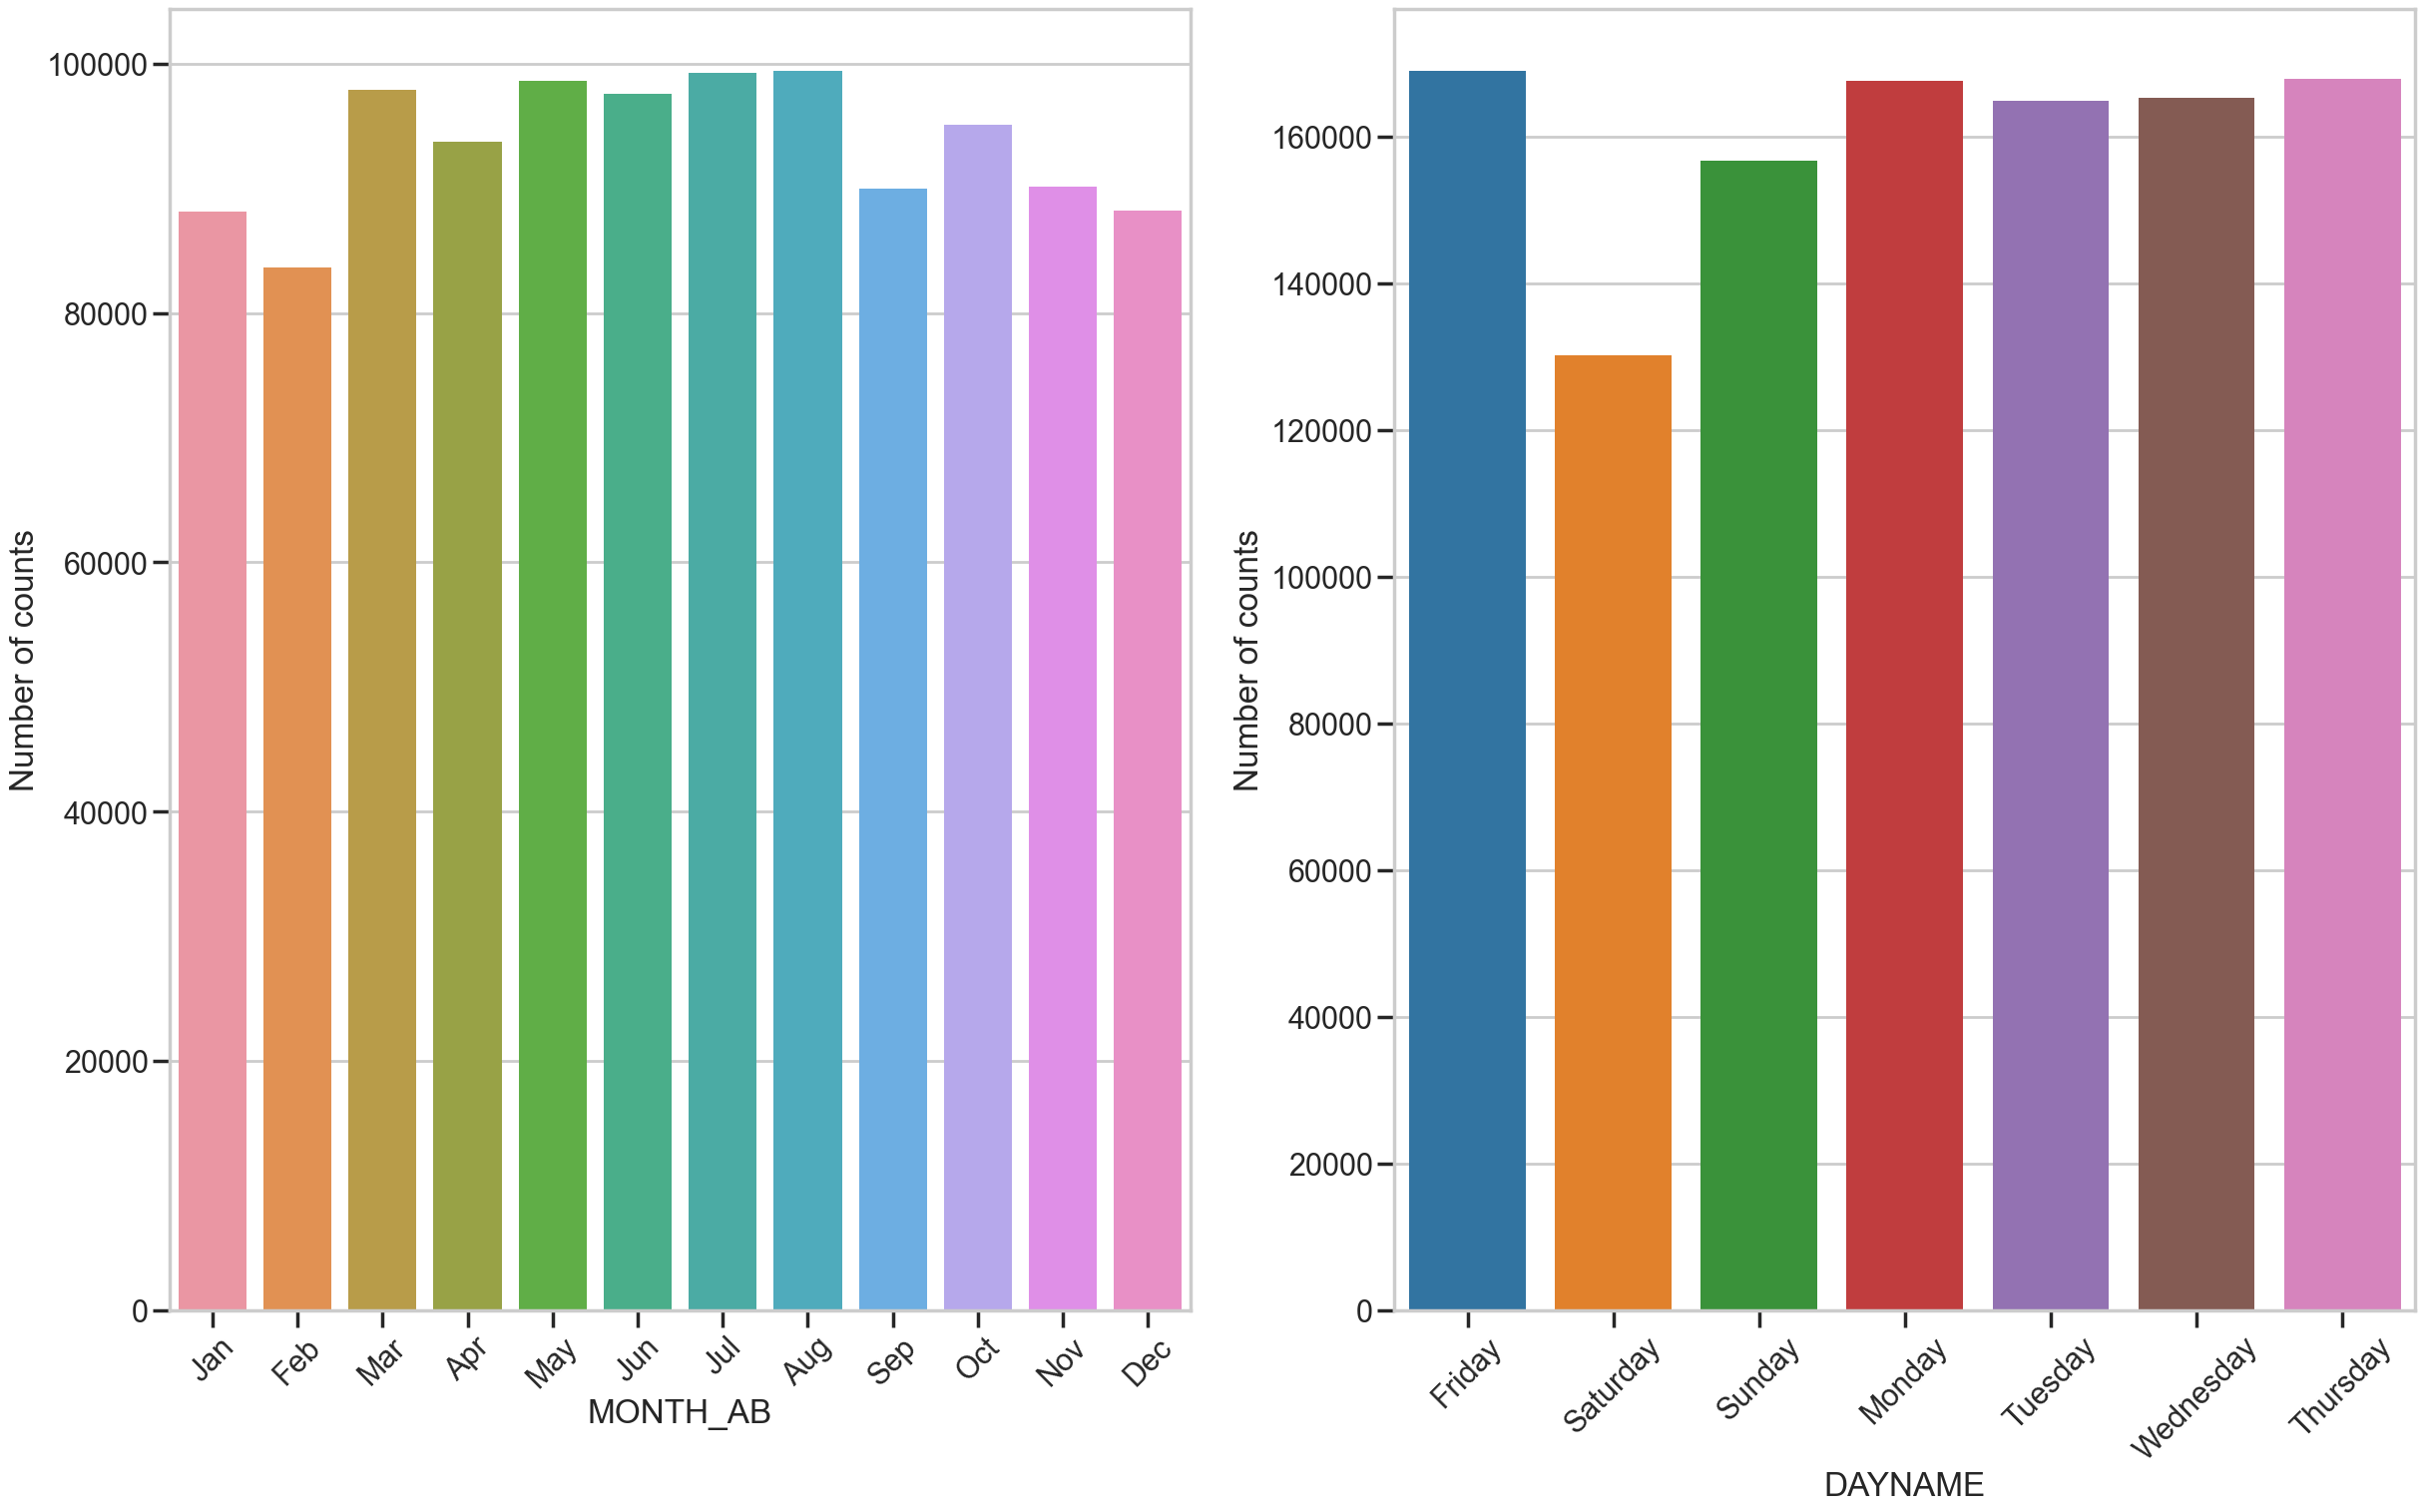

In [44]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)
   
plt.show()

In [45]:
Carrier = pd.get_dummies(df['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(df['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']                  
month= pd.get_dummies(df['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(df['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([df,Carrier,month,day],axis=1)

In [46]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
2,2016-01-01,Delta Airlines,Los Angeles International Airport,Hartsfield-Jackson Atlanta International Airport,1.0,19.0,5.0,-13.0,0.0,245.0,231.0,207.0,1947.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2016-01-01,Delta Airlines,Salt Lake City International Airport,Hartsfield-Jackson Atlanta International Airport,4.0,12.0,8.0,-16.0,0.0,213.0,193.0,173.0,1590.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,4,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
# Drop the redundant columns 

flight_data_new.drop(['FL_DATE', 
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [48]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121727 entries, 2 to 18505717
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   DEP_DELAY                      1121727 non-null  float64
 1   TAXI_OUT                       1121727 non-null  float64
 2   TAXI_IN                        1121727 non-null  float64
 3   DIVERTED                       1121727 non-null  float64
 4   CRS_ELAPSED_TIME               1121727 non-null  float64
 5   ACTUAL_ELAPSED_TIME            1121727 non-null  float64
 6   AIR_TIME                       1121727 non-null  float64
 7   DISTANCE                       1121727 non-null  float64
 8   WHEELS_OFF_elapse              1121727 non-null  float64
 9   WHEELS_ON_elapse               1121727 non-null  float64
 10  FLIGHT_STATUS                  1121727 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     1121727 non-null  uint8  
 12  OP_CARRIER_Am

In [49]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [50]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.3,
    random_state=100)

X_train.shape, X_test.shape

((785208, 44), (336519, 44))

In [51]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [52]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [53]:
sel.features_to_drop_

['DIVERTED']

In [54]:
# Drop the redundant columns 
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [55]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((785208, 43), (336519, 43))

In [56]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [57]:
corrmat

,feature1,feature2,corr
0,AIR_TIME,DISTANCE,0.984341
1,DISTANCE,AIR_TIME,0.984341
2,CRS_ELAPSED_TIME,AIR_TIME,0.984075
3,AIR_TIME,CRS_ELAPSED_TIME,0.984075
4,CRS_ELAPSED_TIME,DISTANCE,0.981234
5,DISTANCE,CRS_ELAPSED_TIME,0.981234
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.979414
7,ACTUAL_ELAPSED_TIME,AIR_TIME,0.979414
8,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.969088
9,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.969088


In [58]:
corrmat.feature1.unique()

array(['AIR_TIME', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME'],
      dtype=object)

In [59]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 43 total features


In [60]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

   feature1             feature2      corr
0  AIR_TIME             DISTANCE  0.984341
3  AIR_TIME     CRS_ELAPSED_TIME  0.984075
6  AIR_TIME  ACTUAL_ELAPSED_TIME  0.979414



In [61]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,AIR_TIME,DISTANCE,0.984341
3,AIR_TIME,CRS_ELAPSED_TIME,0.984075
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.979414


In [62]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [63]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ACTUAL_ELAPSED_TIME,0.510587
3,CRS_ELAPSED_TIME,0.229616
1,CRS_ELAPSED_TIME,0.173047
0,DISTANCE,0.086750


In [64]:
# Drop the redundant columns 
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [65]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [66]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 43 total features


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((897381, 41), (224346, 41))

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([6.05225896e-01, 1.29119843e-01, 2.99950581e-02, 1.84688173e-02,
       6.20600301e-03, 1.43743746e-01, 3.59189898e-02, 1.94150125e-05,
       5.02843046e-04, 1.88829217e-02, 8.99696136e-05, 9.25762583e-07,
       3.10612604e-04, 1.53076507e-04, 8.56666177e-05, 4.21690572e-06,
       5.90582487e-07, 1.77953871e-05, 1.25646058e-03, 1.42967391e-03,
       3.99712857e-04, 5.87461825e-05, 1.93317891e-05, 7.22712727e-05,
       2.24467618e-05, 1.86716087e-04, 6.70596294e-05, 3.13010598e-03,
       2.13961041e-03, 1.27003455e-04, 3.14640360e-05, 1.12486773e-04,
       1.40251392e-03, 4.25296335e-04, 3.31473764e-05, 3.21482291e-05,
       1.09398892e-04, 8.15559689e-05, 2.50647200e-05, 2.28201287e-05,
       6.85777186e-05])

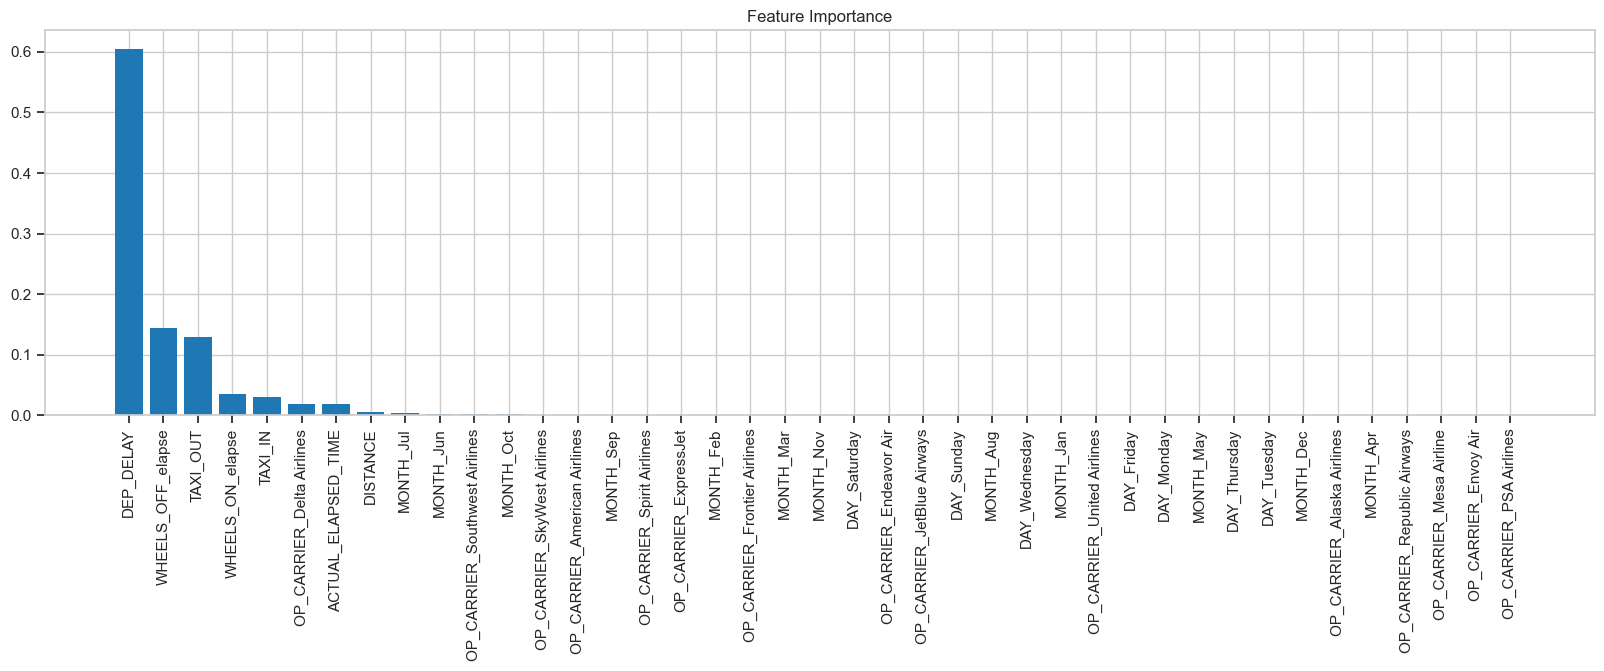

In [69]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [70]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,6.052259e-01
1,WHEELS_OFF_elapse,1.437437e-01
2,TAXI_OUT,1.291198e-01
3,WHEELS_ON_elapse,3.591899e-02
4,TAXI_IN,2.999506e-02
5,OP_CARRIER_Delta Airlines,1.888292e-02
6,ACTUAL_ELAPSED_TIME,1.846882e-02
7,DISTANCE,6.206003e-03
8,MONTH_Jul,3.130106e-03
9,MONTH_Jun,2.139610e-03


In [71]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)


In [72]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121727 entries, 2 to 18505717
Data columns (total 42 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   DEP_DELAY                      1121727 non-null  float64
 1   TAXI_OUT                       1121727 non-null  float64
 2   TAXI_IN                        1121727 non-null  float64
 3   ACTUAL_ELAPSED_TIME            1121727 non-null  float64
 4   DISTANCE                       1121727 non-null  float64
 5   WHEELS_OFF_elapse              1121727 non-null  float64
 6   WHEELS_ON_elapse               1121727 non-null  float64
 7   FLIGHT_STATUS                  1121727 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     1121727 non-null  uint8  
 9   OP_CARRIER_American Airlines   1121727 non-null  uint8  
 10  OP_CARRIER_Delta Airlines      1121727 non-null  uint8  
 11  OP_CARRIER_Endeavor Air        1121727 non-null  uint8  
 12  OP_CARRIER_En

In [73]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [74]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121727 entries, 2 to 18505717
Data columns (total 42 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   DEP_DELAY                      1121727 non-null  float64 
 1   TAXI_OUT                       1121727 non-null  float64 
 2   TAXI_IN                        1121727 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            1121727 non-null  float64 
 4   DISTANCE                       1121727 non-null  float64 
 5   WHEELS_OFF_elapse              1121727 non-null  float64 
 6   WHEELS_ON_elapse               1121727 non-null  float64 
 7   FLIGHT_STATUS                  1121727 non-null  category
 8   OP_CARRIER_Alaska Airlines     1121727 non-null  uint8   
 9   OP_CARRIER_American Airlines   1121727 non-null  uint8   
 10  OP_CARRIER_Delta Airlines      1121727 non-null  uint8   
 11  OP_CARRIER_Endeavor Air        1121727 non-null  uint8   
 12 

In [75]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((897381, 41), (224346, 41))

In [77]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [78]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.970338656841532

Accuracy Random Forest test: 0.8828817986502991

Precision Random Forest test: 0.960968775020016

Recall Random Forest test: 0.15546776334963247

F-measure Random Forest test: 0.26763664743428944

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    193465
           1       0.96      0.16      0.27     30881

    accuracy                           0.88    224346
   macro avg       0.92      0.58      0.60    224346
weighted avg       0.89      0.88      0.84    224346



In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [81]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9896359631058835

Accuracy Logistic Regression: 0.9634582296987688

Precision Logistic Regression: 0.9035402953211172

Recall Logistic Regression: 0.8223179301188434

F-measure Logistic Regression: 0.8610178686467975

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    193465
           1       0.90      0.82      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.94      0.90      0.92    224346
weighted avg       0.96      0.96      0.96    224346



In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [84]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.9172889956840491

Accuracy Decision Tree: 0.9614033680119102

Precision Decision Tree: 0.8622522170057382

Recall Decision Tree: 0.8564165668210226

F-measure Decision Tree: 0.8593244845905155

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    193465
           1       0.86      0.86      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.92      0.92      0.92    224346
weighted avg       0.96      0.96      0.96    224346



In [85]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_precision_recall


from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks
)

In [86]:
def run_all_classifiers(X_train, X_test, y_train, y_test):
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)
    print('Random Forest Classifier')
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))
    skplt.metrics.plot_roc(y_test, pred)
    skplt.metrics.plot_precision_recall(y_test, pred)
    plt.show()
    print('--------------------------------------------------------')

    # Logistic Regression
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)
    print('Logistic Regression')
    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))
    skplt.metrics.plot_roc(y_test, pred)
    skplt.metrics.plot_precision_recall(y_test, pred)
    plt.show()
    print('--------------------------------------------------------')

    # Decision Tree Classifier
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)
    print('Decision Tree Classifier')
    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))
    skplt.metrics.plot_roc(y_test, pred)
    skplt.metrics.plot_precision_recall(y_test, pred)
    plt.show()
    print('--------------------------------------------------------')



Random Forest Classifier
Test set
Roc-auc Random Forests roc-auc: 0.970338656841532

Accuracy Random Forest test: 0.8828817986502991

Precision Random Forest test: 0.960968775020016

Recall Random Forest test: 0.15546776334963247

F-measure Random Forest test: 0.26763664743428944

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    193465
           1       0.96      0.16      0.27     30881

    accuracy                           0.88    224346
   macro avg       0.92      0.58      0.60    224346
weighted avg       0.89      0.88      0.84    224346



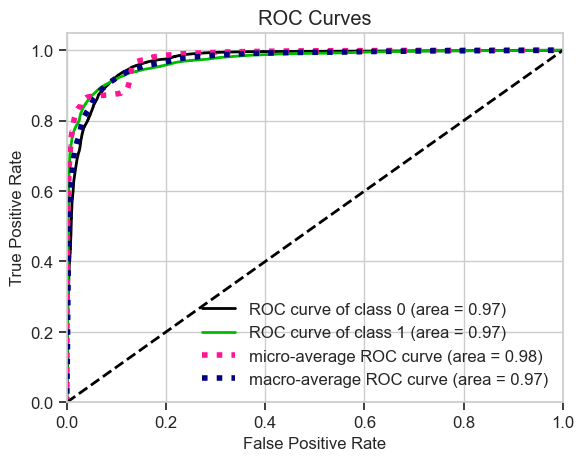

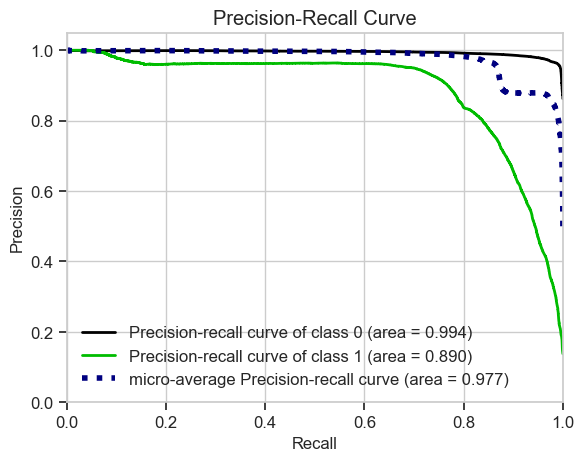

--------------------------------------------------------
Logistic Regression
Test set
Roc-auc Logistic Regression roc-auc: 0.9896359631058835

Accuracy Logistic Regression: 0.9634582296987688

Precision Logistic Regression: 0.9035402953211172

Recall Logistic Regression: 0.8223179301188434

F-measure Logistic Regression: 0.8610178686467975

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    193465
           1       0.90      0.82      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.94      0.90      0.92    224346
weighted avg       0.96      0.96      0.96    224346



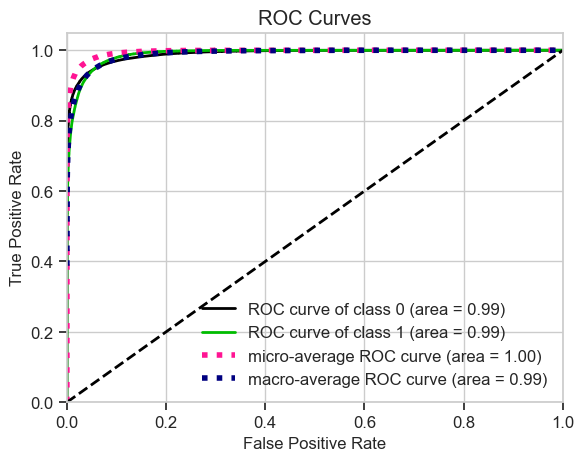

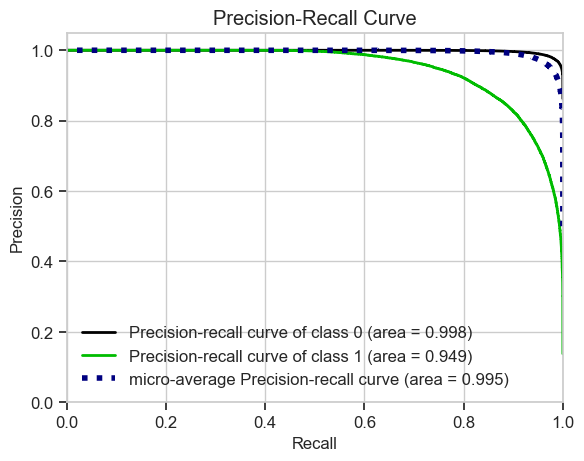

--------------------------------------------------------
Decision Tree Classifier
Test set
Roc-auc Decision Tree roc-auc: 0.9172889956840491

Accuracy Decision Tree: 0.9614033680119102

Precision Decision Tree: 0.8622522170057382

Recall Decision Tree: 0.8564165668210226

F-measure Decision Tree: 0.8593244845905155

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    193465
           1       0.86      0.86      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.92      0.92      0.92    224346
weighted avg       0.96      0.96      0.96    224346



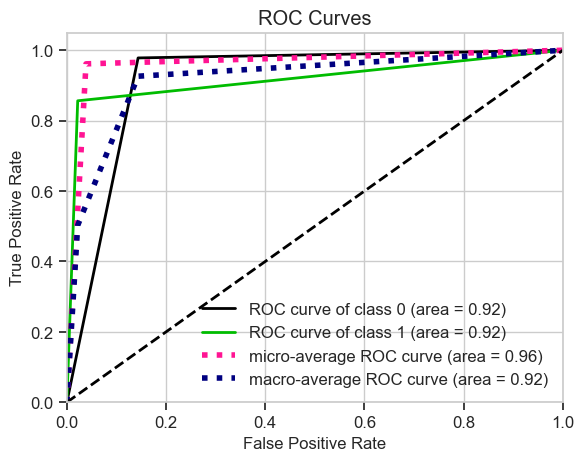

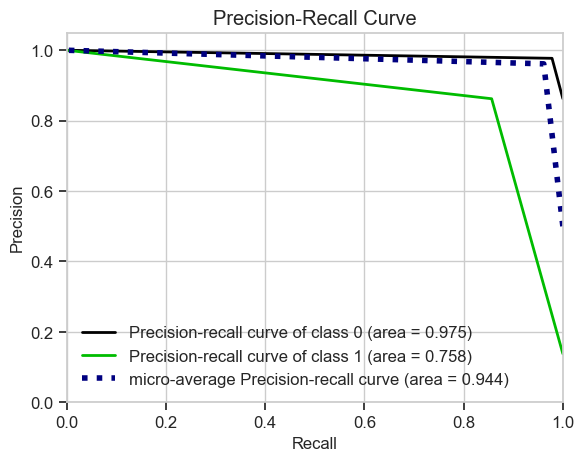

--------------------------------------------------------


In [87]:
run_all_classifiers(X_train, X_test, y_train, y_test)

In [88]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=100,
        replacement=False)
}

In [89]:
datasets_ls = ['flight_data_new']

Full data
Random Forest Classifier
Test set
Roc-auc Random Forests roc-auc: 0.970338656841532

Accuracy Random Forest test: 0.8828817986502991

Precision Random Forest test: 0.960968775020016

Recall Random Forest test: 0.15546776334963247

F-measure Random Forest test: 0.26763664743428944

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    193465
           1       0.96      0.16      0.27     30881

    accuracy                           0.88    224346
   macro avg       0.92      0.58      0.60    224346
weighted avg       0.89      0.88      0.84    224346



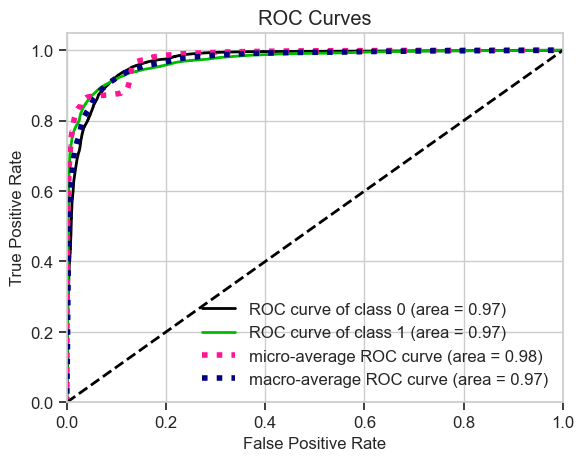

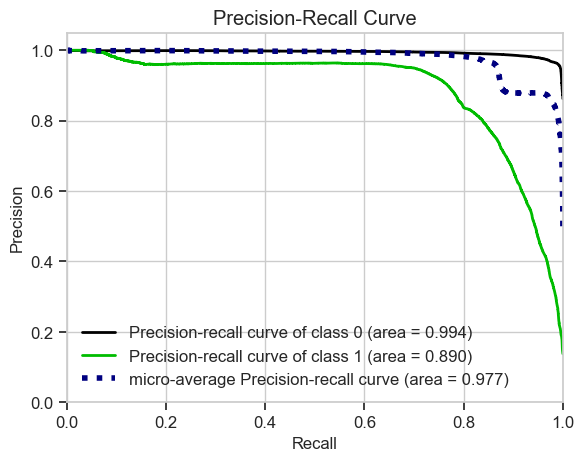

--------------------------------------------------------
Logistic Regression
Test set
Roc-auc Logistic Regression roc-auc: 0.9896359631058835

Accuracy Logistic Regression: 0.9634582296987688

Precision Logistic Regression: 0.9035402953211172

Recall Logistic Regression: 0.8223179301188434

F-measure Logistic Regression: 0.8610178686467975

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    193465
           1       0.90      0.82      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.94      0.90      0.92    224346
weighted avg       0.96      0.96      0.96    224346



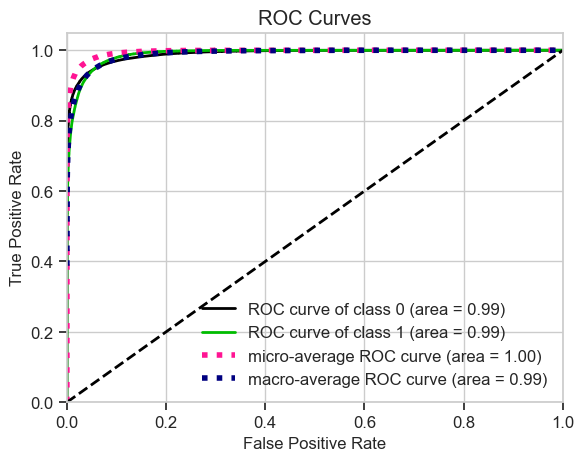

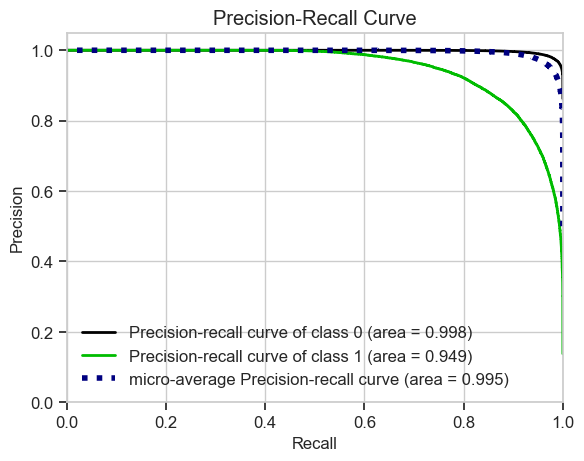

--------------------------------------------------------
Decision Tree Classifier
Test set
Roc-auc Decision Tree roc-auc: 0.9172889956840491

Accuracy Decision Tree: 0.9614033680119102

Precision Decision Tree: 0.8622522170057382

Recall Decision Tree: 0.8564165668210226

F-measure Decision Tree: 0.8593244845905155

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    193465
           1       0.86      0.86      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.92      0.92      0.92    224346
weighted avg       0.96      0.96      0.96    224346



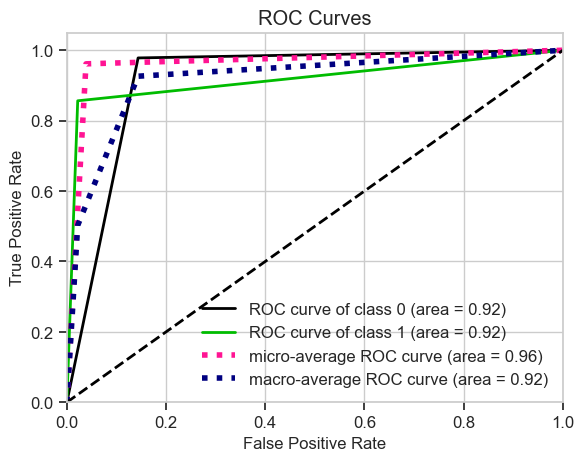

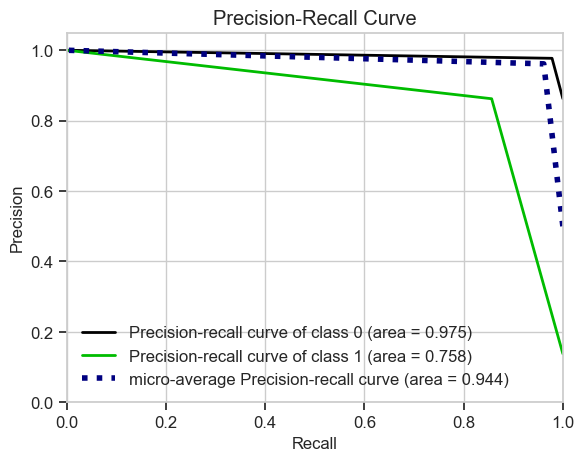

--------------------------------------------------------

random
Random Forest Classifier
Test set
Roc-auc Random Forests roc-auc: 0.9693750439150286

Accuracy Random Forest test: 0.9100541128435542

Precision Random Forest test: 0.6148924292523725

Recall Random Forest test: 0.9273663417635439

F-measure Random Forest test: 0.7394745336001549

Summary Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    193465
           1       0.61      0.93      0.74     30881

    accuracy                           0.91    224346
   macro avg       0.80      0.92      0.84    224346
weighted avg       0.94      0.91      0.92    224346



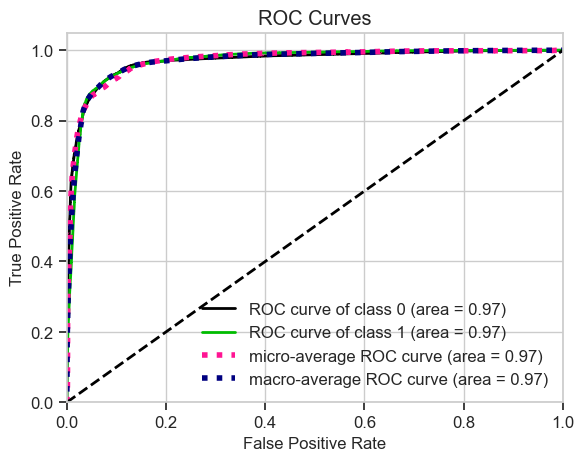

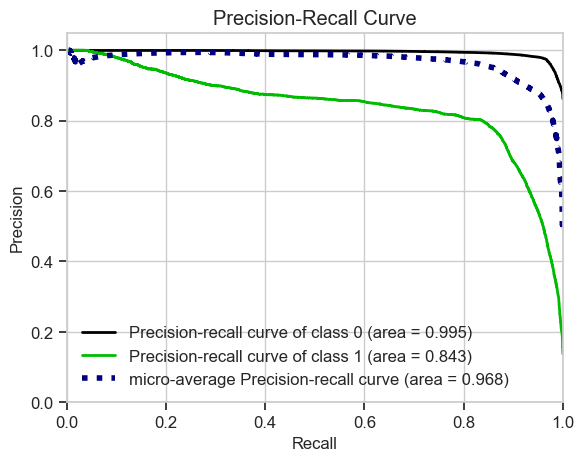

--------------------------------------------------------
Logistic Regression
Test set
Roc-auc Logistic Regression roc-auc: 0.9900834497626715

Accuracy Logistic Regression: 0.9467920087721644

Precision Logistic Regression: 0.738890290037831

Recall Logistic Regression: 0.9487063242770636

F-measure Logistic Regression: 0.8307552707320186

Summary Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    193465
           1       0.74      0.95      0.83     30881

    accuracy                           0.95    224346
   macro avg       0.87      0.95      0.90    224346
weighted avg       0.96      0.95      0.95    224346



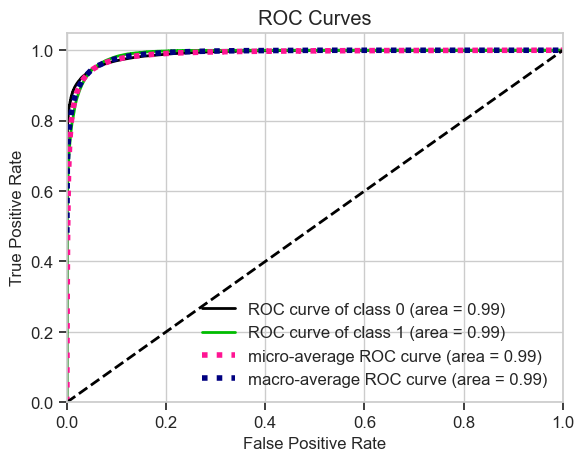

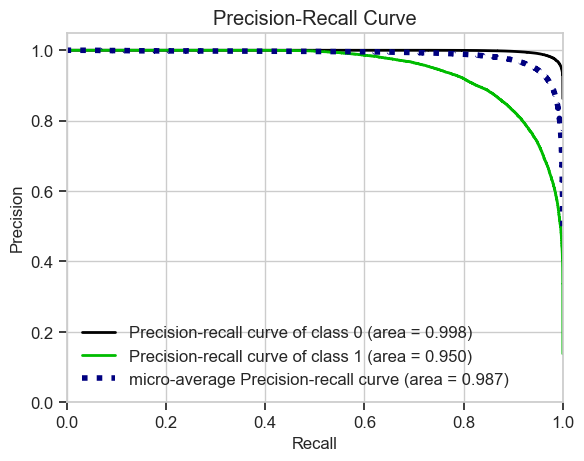

--------------------------------------------------------
Decision Tree Classifier
Test set
Roc-auc Decision Tree roc-auc: 0.9411667066078256

Accuracy Decision Tree: 0.9421563121250212

Precision Decision Tree: 0.7230194319880419

Recall Decision Tree: 0.9398011722418316

F-measure Decision Tree: 0.8172793962349164

Summary Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    193465
           1       0.72      0.94      0.82     30881

    accuracy                           0.94    224346
   macro avg       0.86      0.94      0.89    224346
weighted avg       0.95      0.94      0.95    224346



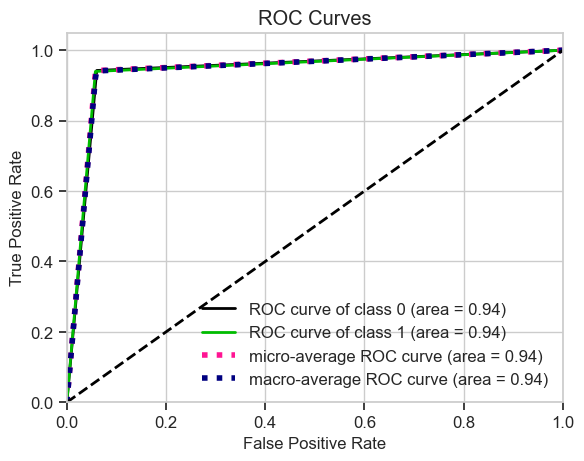

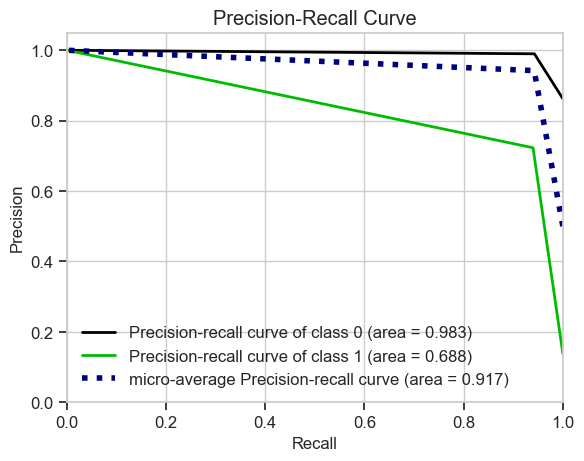

--------------------------------------------------------



In [90]:
for dataset in datasets_ls:
    
    print('Full data')
        
    run_all_classifiers(X_train, X_test, y_train, y_test)
    
    print()
    
    for undersampler in undersampler_dict.keys():
        
        print(undersampler)
        
        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
        run_all_classifiers(X_resampled, X_test, y_resampled, y_test)
        
        print()

In [91]:
from imblearn.over_sampling import (
    RandomOverSampler
)

In [92]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=100)
}

flight_data_new
Random Forest Classifier
Test set
Roc-auc Random Forests roc-auc: 0.970338656841532

Accuracy Random Forest test: 0.8828817986502991

Precision Random Forest test: 0.960968775020016

Recall Random Forest test: 0.15546776334963247

F-measure Random Forest test: 0.26763664743428944

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    193465
           1       0.96      0.16      0.27     30881

    accuracy                           0.88    224346
   macro avg       0.92      0.58      0.60    224346
weighted avg       0.89      0.88      0.84    224346



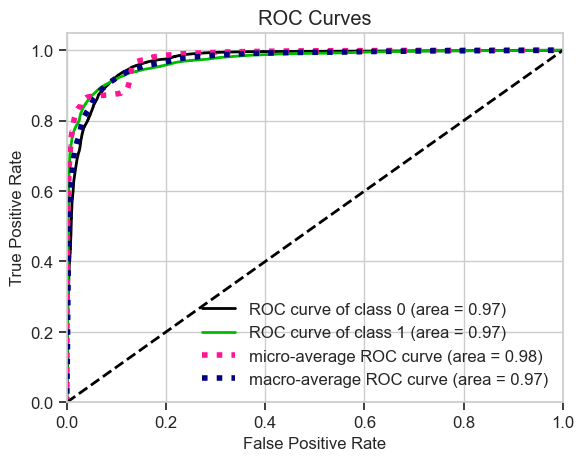

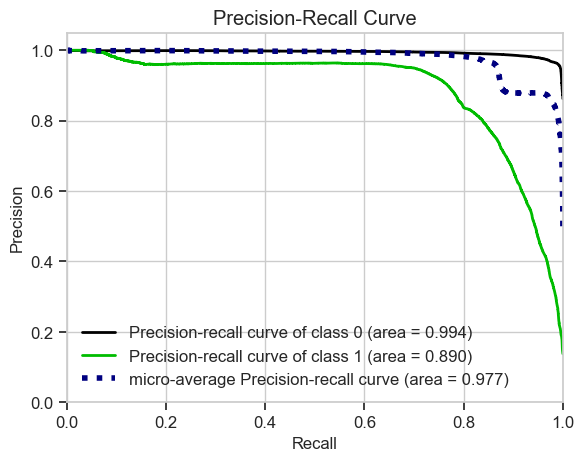

--------------------------------------------------------
Logistic Regression
Test set
Roc-auc Logistic Regression roc-auc: 0.9896359631058835

Accuracy Logistic Regression: 0.9634582296987688

Precision Logistic Regression: 0.9035402953211172

Recall Logistic Regression: 0.8223179301188434

F-measure Logistic Regression: 0.8610178686467975

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    193465
           1       0.90      0.82      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.94      0.90      0.92    224346
weighted avg       0.96      0.96      0.96    224346



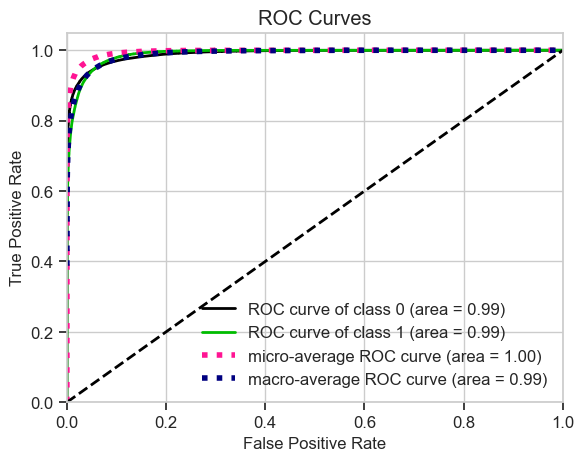

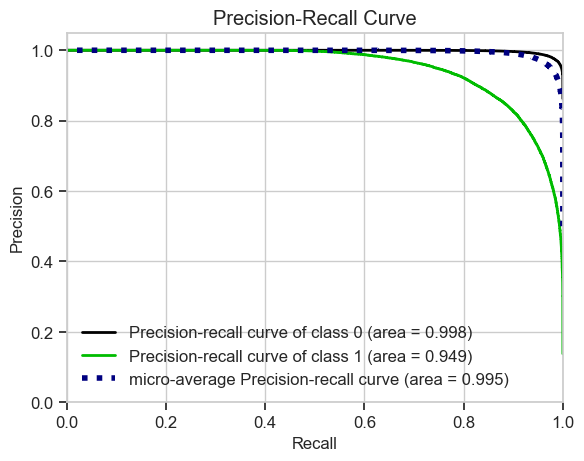

--------------------------------------------------------
Decision Tree Classifier
Test set
Roc-auc Decision Tree roc-auc: 0.9172889956840491

Accuracy Decision Tree: 0.9614033680119102

Precision Decision Tree: 0.8622522170057382

Recall Decision Tree: 0.8564165668210226

F-measure Decision Tree: 0.8593244845905155

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    193465
           1       0.86      0.86      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.92      0.92      0.92    224346
weighted avg       0.96      0.96      0.96    224346



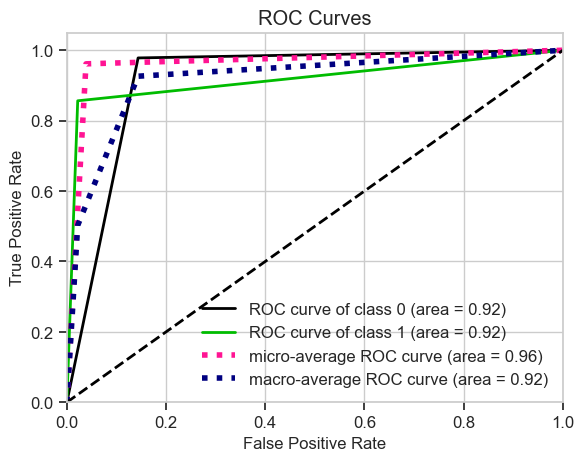

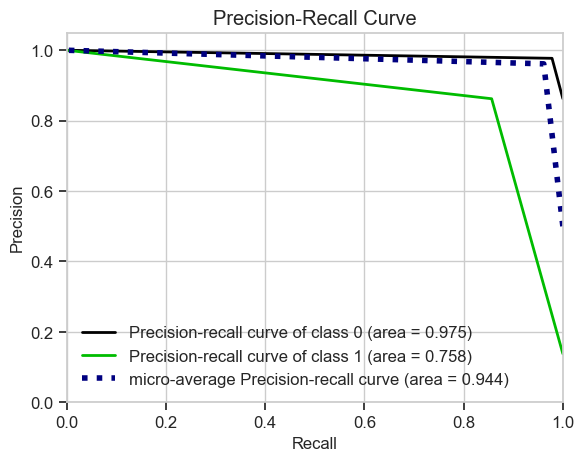

--------------------------------------------------------

random
Status check: Done resampling
Random Forest Classifier
Test set
Roc-auc Random Forests roc-auc: 0.9689024097648594

Accuracy Random Forest test: 0.9113690460271189

Precision Random Forest test: 0.6189302013713148

Recall Random Forest test: 0.9266215472296881

F-measure Random Forest test: 0.7421479886920662

Summary Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    193465
           1       0.62      0.93      0.74     30881

    accuracy                           0.91    224346
   macro avg       0.80      0.92      0.84    224346
weighted avg       0.94      0.91      0.92    224346



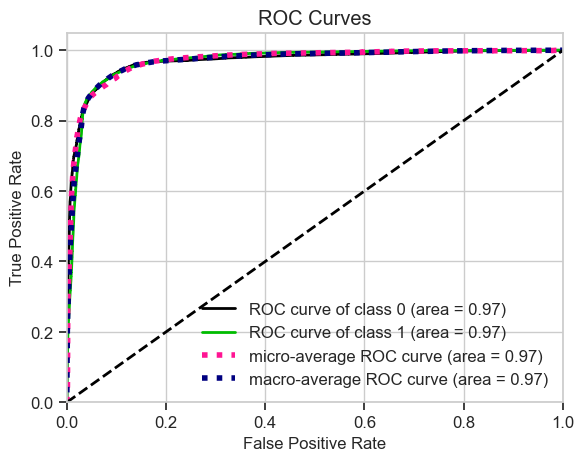

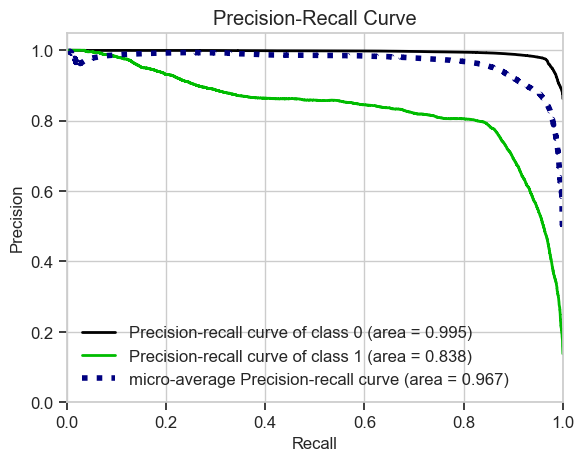

--------------------------------------------------------
Logistic Regression
Test set
Roc-auc Logistic Regression roc-auc: 0.9901451378740269

Accuracy Logistic Regression: 0.9471575156231892

Precision Logistic Regression: 0.7406283199271513

Recall Logistic Regression: 0.948155823969431

F-measure Logistic Regression: 0.8316409855854575

Summary Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    193465
           1       0.74      0.95      0.83     30881

    accuracy                           0.95    224346
   macro avg       0.87      0.95      0.90    224346
weighted avg       0.96      0.95      0.95    224346



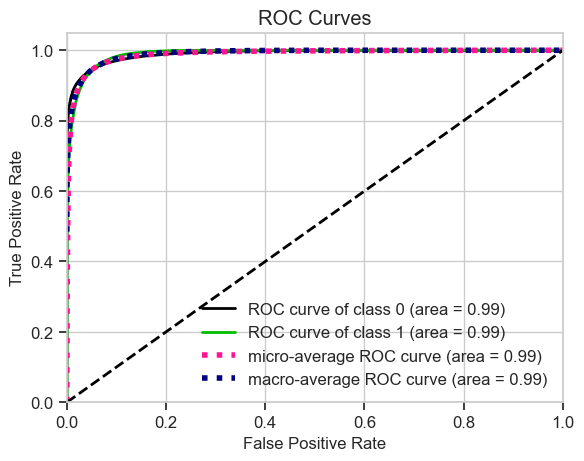

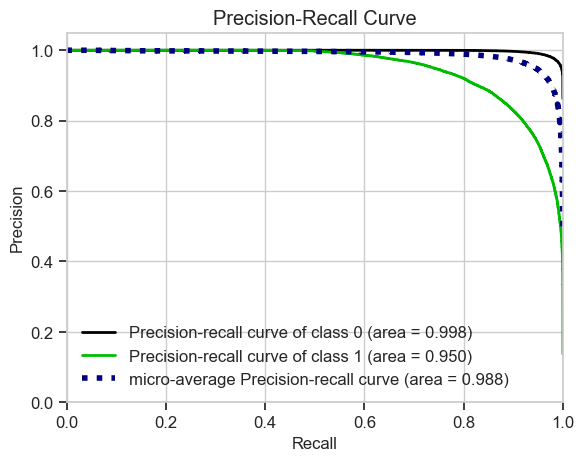

--------------------------------------------------------
Decision Tree Classifier
Test set
Roc-auc Decision Tree roc-auc: 0.9133168327662975

Accuracy Decision Tree: 0.960395995471281

Precision Decision Tree: 0.8617763157894737

Recall Decision Tree: 0.848353356432758

F-measure Decision Tree: 0.8550121571123186

Summary Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    193465
           1       0.86      0.85      0.86     30881

    accuracy                           0.96    224346
   macro avg       0.92      0.91      0.92    224346
weighted avg       0.96      0.96      0.96    224346



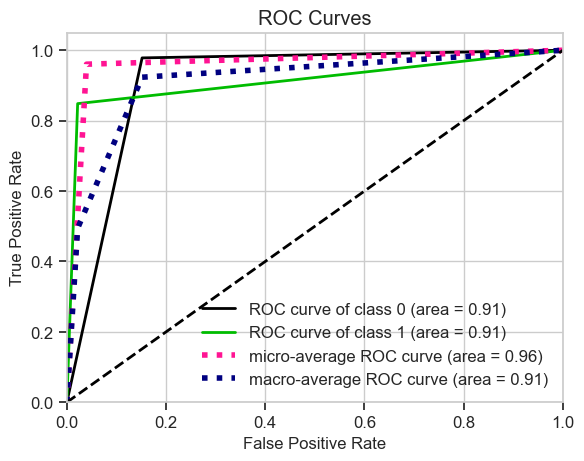

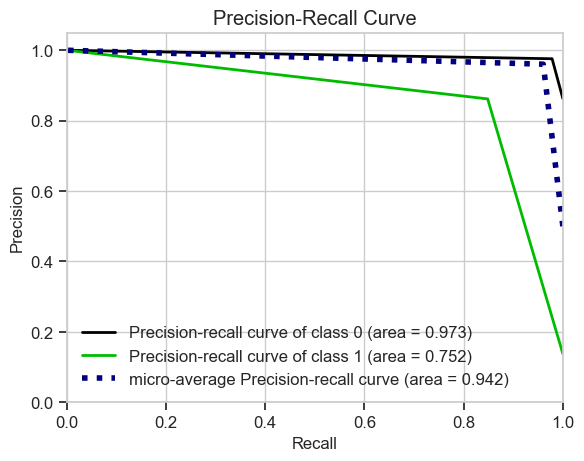

--------------------------------------------------------




In [93]:
for dataset in datasets_ls:
    
    print(dataset)
    
    run_all_classifiers(X_train, X_test, y_train, y_test)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        print("Status check: Done resampling")
        # evaluate performance
        run_all_classifiers(X_resampled, X_test, y_resampled, y_test)
        print()
        
    print()